In [26]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings("ignore")

#### 1.Problem_Statement

In [ ]:
To predict bank customer churn prediction based on following features:
CreditScore
Geography
Gender
Age
Tenure
Balance
NumOfProducts
HasCrCard
IsActiveMember
EstimatedSalary

#### 2.Dataset_Reading

In [4]:
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


#### 3.Exploratory_Data_Analysis

In [7]:
#shape of data
df.shape

(10000, 14)

In [ ]:
Dataset has 10000 columns and 14 rows

In [8]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
Dataset has int,float and object data type columns. Object data type columns will be encoded

In [9]:
# missing values
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
Dataset has no missing values

In [10]:
# statistical information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
different columns has different scale so need for standardization to ensure equal contribution of all features

In [12]:
# target columns variable
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
Dataset is highly imbalance as class 0 has majority than class 1

#### 4.Feature_Engineering

In [13]:
# seperating dataset into independant and dependant variable
# here "RowNumber","CustomerId","Surname" column are not important so these features will be dropped
x = df.drop(["RowNumber","CustomerId","Surname","Exited"],axis = 1)
y = df["Exited"]

In [14]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [15]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [16]:
# encoding categorical variables
geography = pd.get_dummies(x["Geography"],drop_first=True)
gender = pd.get_dummies(x["Gender"],drop_first=True)

In [17]:
# drop Geography and Gender from x variable
x = x.drop(["Geography","Gender"],axis = 1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [18]:
# concatenating x ,geography and gender into one dataframe
x = pd.concat([x,geography,gender],axis = 1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [21]:
# splitting dataset into training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 42)

In [23]:
# feature scaling
scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train),columns = x.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test),columns = x.columns)


In [24]:
x_train_scaled.shape

(8000, 11)

In [25]:
x_test_scaled.shape

(2000, 11)

#### 5.Model_Building(Creating_ANN)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,PReLU,LeakyReLU,ELU
from tensorflow.keras.layers import Dropout

In [28]:
# initialise ANN
classifier = Sequential()

In [29]:
# add input layer
classifier.add(Dense(units = 11,activation = "relu"))

In [30]:
# add first hidden layer
classifier.add(Dense(units = 7,activation = "relu"))
classifier.add(Dropout(0.2))

In [31]:
# add second hidden layer
classifier.add(Dense(units = 6,activation = "relu"))
classifier.add(Dropout(0.3))

In [32]:
# add output layer
classifier.add(Dense(1,activation = "sigmoid"))

In [33]:
classifier.compile(optimizer = "adam",loss="binary_crossentropy",metrics=["accuracy"])

In [34]:
# learning_rate by default is 0.01

In [35]:
# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False)

In [36]:
model_history = classifier.fit(x_train_scaled,y_train,validation_split = 0.33,batch_size = 10,epochs = 100,callbacks = early_stopping)

Epoch 1/100
536/536 [==============================] - 3s 4ms/step - loss: 0.6255 - accuracy: 0.7096 - val_loss: 0.5035 - val_accuracy: 0.7910
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.5077 - accuracy: 0.7968 - val_loss: 0.4604 - val_accuracy: 0.7982
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4833 - accuracy: 0.8069 - val_loss: 0.4453 - val_accuracy: 0.8107
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4620 - accuracy: 0.8104 - val_loss: 0.4357 - val_accuracy: 0.8141
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4474 - accuracy: 0.8168 - val_loss: 0.4311 - val_accuracy: 0.8145
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4483 - accuracy: 0.8203 - val_loss: 0.4310 - val_accuracy: 0.8152
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4380 - accuracy: 0.8166 - val_loss: 0.4169 - val_accuracy: 0.8160

Epoch 58/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3568 - accuracy: 0.8589 - val_loss: 0.3640 - val_accuracy: 0.8466
Epoch 59/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3523 - accuracy: 0.8565 - val_loss: 0.3648 - val_accuracy: 0.8478
Epoch 60/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3525 - accuracy: 0.8608 - val_loss: 0.3649 - val_accuracy: 0.8482
Epoch 61/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3444 - accuracy: 0.8630 - val_loss: 0.3664 - val_accuracy: 0.8470
Epoch 62/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3491 - accuracy: 0.8599 - val_loss: 0.3684 - val_accuracy: 0.8489
Epoch 63/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3511 - accuracy: 0.8595 - val_loss: 0.3673 - val_accuracy: 0.8444
Epoch 64/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3526 - accuracy: 0.8574 - val_loss: 0.3656 - val_accuracy:

In [37]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

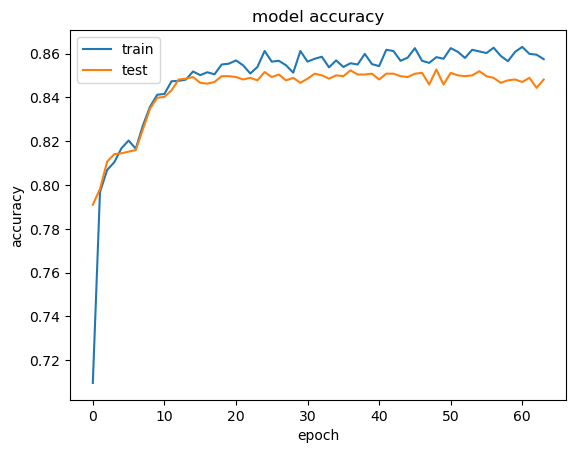

In [41]:
# summary history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history["val_accuracy"])
plt.title("model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train","test"],loc ="upper left")
plt.show()

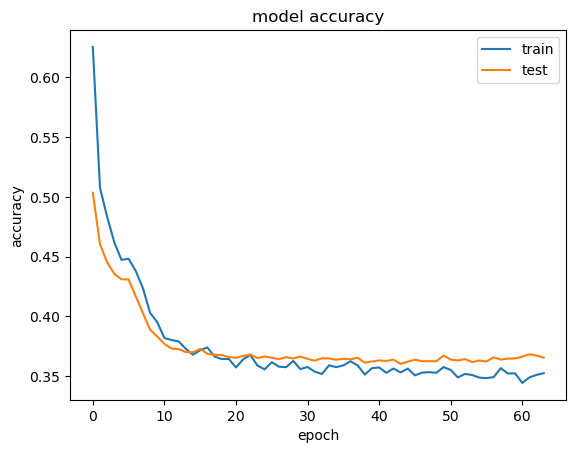

In [42]:
# summary hisrory for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history["val_loss"])
plt.title("model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train","test"],loc ="upper right")
plt.show()

In [43]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 7)                 84        
                                                                 
 dropout (Dropout)           (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 6)                 48        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 271 (1.06 KB)
Trainable params: 271 (1.06 

#### 6.Model_Evaluation

In [51]:
# test data
y_pred_test = classifier.predict(x_test_scaled)
y_pred_test = (y_pred_test>= 0.5)

acc_score = accuracy_score(y_pred_test,y_test)
print("ACCURACY_SCORE :",acc_score)
print("********************************")

cnf_matrix = confusion_matrix(y_pred_test,y_test)
print("CONFUSION_MATRIX :\n",cnf_matrix)
print("********************************")

clf_report = classification_report(y_pred_test,y_test)
print("CLASSIFICATION_REPORT :\n",clf_report)
print("********************************")

63/63 [==============================] - 0s 2ms/step
ACCURACY_SCORE : 0.8575
********************************
CONFUSION_MATRIX :
 [[1569  247]
 [  38  146]]
********************************
CLASSIFICATION_REPORT :
               precision    recall  f1-score   support

       False       0.98      0.86      0.92      1816
        True       0.37      0.79      0.51       184

    accuracy                           0.86      2000
   macro avg       0.67      0.83      0.71      2000
weighted avg       0.92      0.86      0.88      2000

********************************


In [47]:
classifier.evaluate(x_test_scaled,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3478 - accuracy: 0.8575


[0.34778448939323425, 0.8575000166893005]

In [45]:
# train data
y_pred_train = classifier.predict(x_train_scaled)
y_pred_train = (y_pred_train>= 0.5)

acc_score = accuracy_score(y_pred_train,y_train)
print("ACCURACY_SCORE :",acc_score)
print("********************************")

cnf_matrix = confusion_matrix(y_pred_train,y_train)
print("CONFUSION_MATRIX :\n",cnf_matrix)
print("********************************")

clf_report = classification_report(y_pred_train,y_train)
print("CLASSIFICATION_REPORT :\n",clf_report)
print("********************************")

250/250 [==============================] - 0s 2ms/step
ACCURACY_SCORE : 0.863
********************************
CONFUSION_MATRIX :
 [[6238  978]
 [ 118  666]]
********************************
CLASSIFICATION_REPORT :
               precision    recall  f1-score   support

       False       0.98      0.86      0.92      7216
        True       0.41      0.85      0.55       784

    accuracy                           0.86      8000
   macro avg       0.69      0.86      0.73      8000
weighted avg       0.92      0.86      0.88      8000

********************************


In [46]:
classifier.evaluate(x_train_scaled,y_train)

250/250 [==============================] - 1s 2ms/step - loss: 0.3349 - accuracy: 0.8630


[0.3348577618598938, 0.8629999756813049]

In [ ]:
# get the weight
# classifier.get_weights()

#### 

#### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### Model_Building Alternate Method

In [ ]:
# model = keras.Sequential([
#     # input layer
#     keras.layers.Dense(19, input_shape=(19,), activation='relu'),
#     keras.layers.Dense(15, activation='relu'),
#     keras.layers.Dense(10,activation = 'relu'),
#     # we use sigmoid for binary output
#     # output layer
#     keras.layers.Dense(1, activation='sigmoid')

In [49]:
model = keras.Sequential([keras.layers.Dense(11,input_shape=(11,), activation = "relu"),
                         keras.layers.Dense(7,activation="relu"),
                         keras.layers.Dense(6,activation="relu"),
                         keras.layers.Dense(1,activation='sigmoid')
                         ])

In [52]:
# compiling model
model.compile(optimizer='adam',
                loss="binary_crossentropy",
                metrics=["accuracy"])

In [53]:
model.fit(x_train_scaled,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5263 - accuracy: 0.7650
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4465 - accuracy: 0.8046
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4277 - accuracy: 0.8136
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.8240
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3876 - accuracy: 0.8330
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3702 - accuracy: 0.8424
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3625 - accuracy: 0.8474
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3581 - accuracy: 0.8522
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3559 - accuracy: 0.8524
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3534 - accura

250/250 [==============================] - 0s 2ms/step - loss: 0.3238 - accuracy: 0.8650
Epoch 82/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8669
Epoch 83/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3232 - accuracy: 0.8683
Epoch 84/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3240 - accuracy: 0.8664
Epoch 85/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3234 - accuracy: 0.8656
Epoch 86/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3241 - accuracy: 0.8674
Epoch 87/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3229 - accuracy: 0.8671
Epoch 88/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3232 - accuracy: 0.8670
Epoch 89/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3232 - accuracy: 0.8676
Epoch 90/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3227 - accuracy: 

In [54]:
# test_data
y_pred_test = model.predict(x_test_scaled)
y_pred_test = (y_pred_test>= 0.5)

acc_score = accuracy_score(y_pred_test,y_test)
print("ACCURACY_SCORE :",acc_score)
print("********************************")

cnf_matrix = confusion_matrix(y_pred_test,y_test)
print("CONFUSION_MATRIX :\n",cnf_matrix)
print("********************************")

clf_report = classification_report(y_pred_test,y_test)
print("CLASSIFICATION_REPORT :\n",clf_report)
print("********************************")

63/63 [==============================] - 0s 2ms/step
ACCURACY_SCORE : 0.8625
********************************
CONFUSION_MATRIX :
 [[1538  206]
 [  69  187]]
********************************
CLASSIFICATION_REPORT :
               precision    recall  f1-score   support

       False       0.96      0.88      0.92      1744
        True       0.48      0.73      0.58       256

    accuracy                           0.86      2000
   macro avg       0.72      0.81      0.75      2000
weighted avg       0.90      0.86      0.87      2000

********************************


In [55]:
# train data
y_pred_train = model.predict(x_train_scaled)
y_pred_train = (y_pred_train>= 0.5)

acc_score = accuracy_score(y_pred_train,y_train)
print("ACCURACY_SCORE :",acc_score)
print("********************************")

cnf_matrix = confusion_matrix(y_pred_train,y_train)
print("CONFUSION_MATRIX :\n",cnf_matrix)
print("********************************")

clf_report = classification_report(y_pred_train,y_train)
print("CLASSIFICATION_REPORT :\n",clf_report)
print("********************************")

250/250 [==============================] - 0s 2ms/step
ACCURACY_SCORE : 0.867875
********************************
CONFUSION_MATRIX :
 [[6138  839]
 [ 218  805]]
********************************
CLASSIFICATION_REPORT :
               precision    recall  f1-score   support

       False       0.97      0.88      0.92      6977
        True       0.49      0.79      0.60      1023

    accuracy                           0.87      8000
   macro avg       0.73      0.83      0.76      8000
weighted avg       0.90      0.87      0.88      8000

********************************


In [69]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

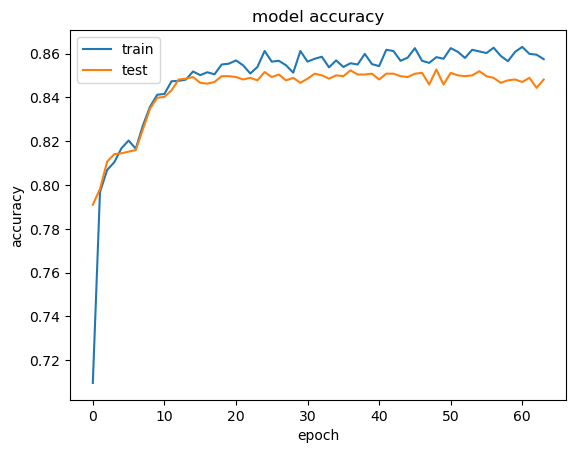

In [70]:
# summary history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history["val_accuracy"])
plt.title("model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train","test"],loc ="upper left")
plt.show()

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 7)                 84        
                                                                 
 dense_6 (Dense)             (None, 6)                 48        
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 271 (1.06 KB)
Trainable params: 271 (1.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


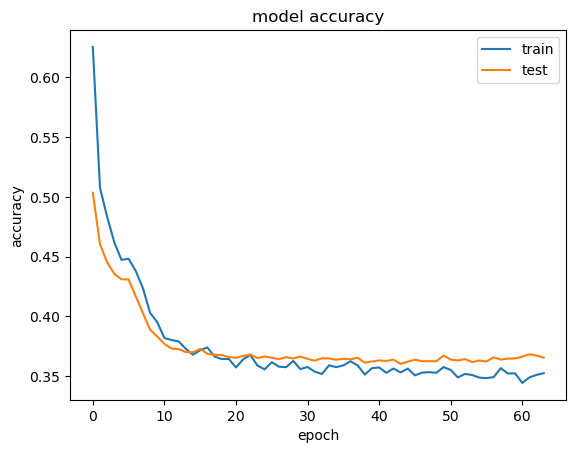

In [71]:
# summary hisrory for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history["val_loss"])
plt.title("model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train","test"],loc ="upper right")
plt.show()